<a href="https://colab.research.google.com/github/kisanpawar/mscp/blob/main/Tensorflow_(Fashion_MNIST_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7768 - loss: 0.6408 - val_accuracy: 0.8552 - val_loss: 0.4152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8604 - loss: 0.3853 - val_accuracy: 0.8631 - val_loss: 0.3783
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8750 - loss: 0.3398 - val_accuracy: 0.8713 - val_loss: 0.3640
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8832 - loss: 0.3136 - val_accuracy: 0.8654 - val_loss: 0.3678
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8908 - loss: 0.2922 - val_accuracy: 0.8658 - val_loss: 0.3687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8960 - loss: 0.2810 - val_accuracy: 0.8695 - val_loss: 0.3503
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9036 - loss: 0.2586 - val_accuracy: 0.8819 - val_loss: 0.3334
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9051 - loss: 0.2527

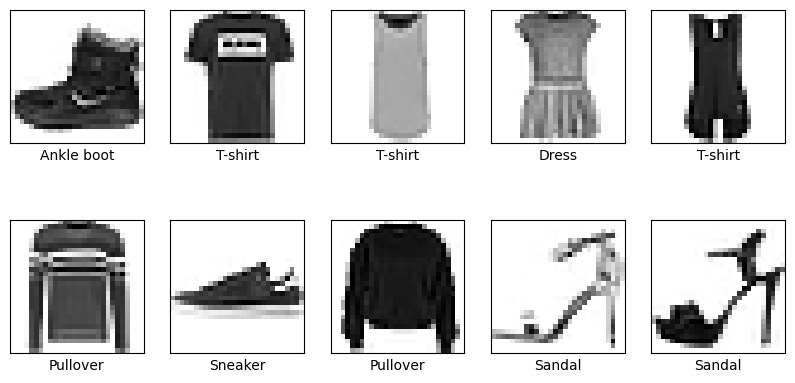

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Normalize the images to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the images to vectors of size 784 (28 * 28)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# 2. Build the MLP model
model = models.Sequential([
layers.InputLayer(input_shape=(28 * 28,)), # Input layer (flattened 28x28 images)
layers.Dense(128, activation='relu'), # First hidden layer with 128 neurons
layers.Dense(64, activation='relu'), # Second hidden layer with 64 neurons
layers.Dense(10, activation='softmax') # Output layer with 10 classes (clothing types)
])
# 3. Compile the model
model.compile(
optimizer='adam', # Adam optimizer
loss='categorical_crossentropy', # Categorical cross-entropy loss
metrics=['accuracy'] # Track accuracy during training
)
# 4. Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


# 5. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


import matplotlib.pyplot as plt

# Show first 10 images with labels
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])  # Get class name
plt.show()
